In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Step 2: Load Dataset
df = pd.read_csv("Crop_Yield_Data.csv")
print("First 5 records:")
print(df.head())

First 5 records:
   Region_ID  Rainfall_mm  Avg_Temperature_C  Soil_Quality  Years_Cultivated  \
0          1          900                 25             8                 5   
1          2          850                 26             7                 4   
2          3          920                 24             9                 6   
3          4          780                 28             6                 3   
4          5          950                 23             9                 7   

   Yield_ton_per_ha  
0               4.5  
1               4.2  
2               4.8  
3               3.8  
4               5.0  


In [3]:
# Step 3: Data Preprocessing
df = df.dropna()  # Remove any missing rows

# Define independent variables and target
X = df[["Rainfall_mm", "Avg_Temperature_C", "Soil_Quality", "Years_Cultivated"]]
y = df["Yield_ton_per_ha"]

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
# Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict on Test Data
y_pred = model.predict(X_test)

# Step 7: Evaluate Model
print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")


Model Evaluation:
Mean Absolute Error: 0.044
Mean Squared Error: 0.003
R² Score: 0.991


In [5]:
# Step 8: Compare Actual vs Predicted Yields
results = pd.DataFrame({"Actual": y_test, "Predicted": np.round(y_pred, 2)})
print("\nActual vs Predicted Crop Yields:")
print(results.head())



Actual vs Predicted Crop Yields:
    Actual  Predicted
13     3.7       3.71
39     4.4       4.31
30     5.2       5.23
45     4.4       4.34
17     4.4       4.34


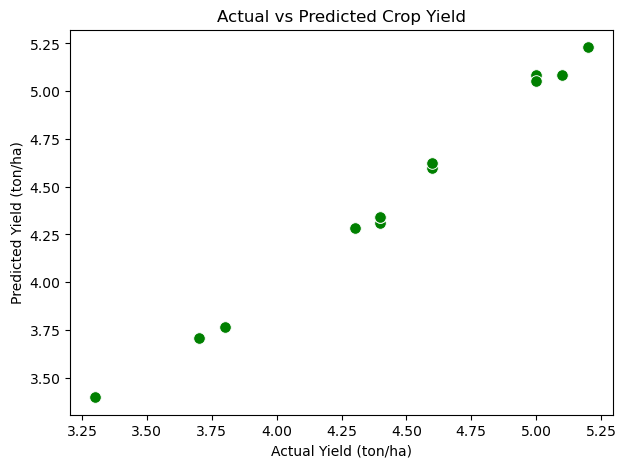

In [6]:
# Step 9: Visualization
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='green', s=70)
plt.xlabel("Actual Yield (ton/ha)")
plt.ylabel("Predicted Yield (ton/ha)")
plt.title("Actual vs Predicted Crop Yield")
plt.show()

In [7]:
# Step 10: Predict for a New Region
new_region = pd.DataFrame({
    "Rainfall_mm": [950],
    "Avg_Temperature_C": [24],
    "Soil_Quality": [8],
    "Years_Cultivated": [6]
})

predicted_yield = model.predict(new_region)
print(f"\nPredicted Crop Yield for the new region: {predicted_yield[0]:.2f} tons/ha")


Predicted Crop Yield for the new region: 4.83 tons/ha
